In [1]:
from IPython.core.display import HTML
from string import Template
def jsConfig():
    src = """
    <script>require.config({ baseUrl: 'https://rawgit.com/kompgraf/course-material/master/assets/' });</script>
    """
    return HTML(src)
def addScript(script, identifier):
    src = Template("""
    <div id="${identifier}-container"></div>
    <script>require(['${script}'], main => main($$("#${identifier}-container"), '${identifier}'));</script>
    """)
    return HTML(src.substitute(script = script, identifier = identifier))
jsConfig()


# Cardinal Spline

## Bevezetés

A következő jegyzet a nevével ellentétben több görbével fog foglalkozni, nem csak a Cardinal Spline-nal. Megismerkedünk a Cardinal Spline egy speciális változatával, a Catmull-Rom Spline-nal, valamint egy általánosított verziójával, a Kochanek-Bartels Spline-nal.

## Mi az a spline görbe?

A spline görbéket több, kisebb görbedarab megfelelő folytonosságú összeillesztésével nyerjük. A spline görbéket előállító függvények általában szakaszonként értelmezettek, és leggyakrabban harmadfokú polinom formájában adottak, azonban alacsonyabb vagy magasabb fokszámú polinomok is alkalmazhatóak.

### Görbék megadása szakaszonként definiált függvénnyel

Előfordulhat, hogy egy görbét egy függvénnyel csak nehézkesen tudunk leírni. Ilyen esetben felbonthatjuk a görbét több kisebb darabra, melyek alkalmasan csatlakoznak egymáshoz. Viszont ez befolyásolja a görbe paraméteres alakját is. 

Tegyük fel, hogy egy görbét két kisebb, egyszerűbben felírható darabból szeretnénk összeilleszteni. Legyen az első darabot előállító függvény $f_0(t_0)$, ahol $t_0 \in [0, 1]$, a második darabot előállító függvény pedig $f_1(t_1)$, ahol $t_1 \in [0, 1]$. Az eredeti görbét leíró függvény legyen $f(t)$, ahol $t$ szintén a $[0, 1]$ tartományból vehet fel értékeket. Ekkor $f(t)$ a következő szakaszonként definiált függvény formájában írható fel:

$$
f(t) =
\begin{cases}
f_0(2t) & \text{ha } t \in [0,\, 0{,}5] \\
f_1(2t - 1) & \text{ha } t \in (0{,}5,\, 1]
\end{cases}
$$

> A továbbiakban a szakaszosan definiált függvények képletében elhagyjuk a *ha* szót az olvashatóság érdekében.

Látható, hogy $f$ eredeti $[0, 1]$ értelmezési tartományát két részre osztottuk. Az első felében a paraméter úgyszólván az első görbedarabon fut végig, a második felében pedig a második görbedarabon.

Természetesen a fenti $f$ függvénynek akkor van igazi jelentősége, ha az egyes szakaszokért felelős függvények megfelelő folytonosságú csatlakozást biztosítanak. A fenti esetben tehát legalább azt megköveteljük, hogy $f_1(1) = f_2(0)$.

Azt is érdemes megjegyezni, hogy bár használhatunk különböző típusú függvényeket a különböző szakaszok fölött, általában az egyszerűség kedvéért azonosokat alkalmazunk; leggyakrabban harmadfokú polinom-függvényeket.

A szakaszonként definiált függvények alkalmazása görbék előállítására óriási jelentőségű, hiszen rendkívüli rugalmasságot biztosítanak. Dönthetünk például úgy, hogy kevesebb darabból illesztünk össze egy görbét, viszont így az egyes darabok bonyolultabbak lesznek. Ha viszont elfogadjuk, hogy több kisebb darabból kell összeállítanunk a görbét, akkor egyszerűbb függvényekkel dolgozhatunk az egyes szakaszokon.

A fenti felírás azonban látszólag ellentmondásban van az eddig állítottakkal, miszerint bármilyen (harmadfokú) görbét felírhatunk a kontrollpontok lineáris kombinációjaként, valamilyen paramétertartományon értelmezve:

$$
g(t) = \sum\limits_{i=0}^{n}g_i(t) \cdot P_i
$$

Hogyan lehet ez a kettő egyszerre igaz? Úgy, hogy a két felírás valójában ekvivalens, csak az a kérdés, hogy a szakaszokra bontást hol végezzük el.

#### Átírás a két alak között

Írjunk fel az előző $f(t)$ görbével ekvivalens görbét! Tegyünk fel, hogy az $f_0(t_0)$ és az $f_1(t_1)$ függvények is egy-egy szakaszt határoznak meg, az előbbi a $P_0, P_1$, utóbbi a $P_1, P_2$ pontok között. Formalizálva:

$$
\begin{align*}
f_0(t_0) &= (1 - t_0)P_0 + t_0P_1 \\
\\
f_1(t_1) &= (1 - t_1)P_1 + t_1P_2 \\
\end{align*}
$$

Keresünk egy olyan függvényt, mely a következő formában adott:

$$
h(t) = h_0(t)P_0 + h_1(t)P_1+h_2(t)P_2 = \sum\limits_{i=0}^{2}h_i(t)P_i \qquad t \in [0, 1]
$$

Tehát meg kellene határoznunk, hogy az egyes kontrollpontokhoz milyen súlyfüggvények tartoznak. Ez praktikusan annyit jelent, hogy arra vagyunk kíváncsiak, hogy egy adott $t$ paraméterértéknél melyik kontrollpont milyen befolyással van a görbére. Ehhez vissza kell térnünk az eredeti $f(t)$ függvényhez, és behelyettesíteni az $f_0(t_0)$ és $f_1(t_1)$ függvényeket:

$$
f(t) =
\begin{cases}
(1 - 2t)P_0 + 2tP_1 & t \in [0, 0.5] \\
2tP_1 + (2t - 1)P_2 & t \in (0.5, 1]
\end{cases}
$$

Nincs más dolgunk most már, mint megnézni, hogy az egyes szakaszokon a kontrollpontok milyen együtthatóval rendelkeznek. Például, ha $t$ $0$ és $0.5$ közötti értéket vesz fel, akkor $P_0$ az $(1-2t)$ kifejezéssel van megszorozva, míg $0.5$ és $1$ között meg sem jelenik, azaz az együtthatója nulla.

Ha a maradék két kontrollpontra is elvégezzük az előző vizsgálódást, akkor valójában készen vagyunk, meghatároztuk a súlyfüggvényeket:

$$
h_0(t) =
\begin{cases}
1 - 2t & t \in [0, 0.5] \\
0 & t \in (0.5, 1]
\end{cases} 
$$

$$
h_1(t) =
\begin{cases}
2t & t \in [0, 0.5] \\
2(1-t) & t \in (0.5, 1]
\end{cases} 
$$

$$
h_2(t) =
\begin{cases}
0 & t \in [0, 0.5] \\
2t - 1 & t \in (0.5, 1] 
\end{cases}
$$

In [36]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

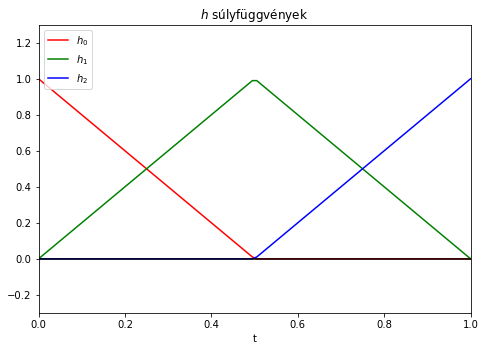

In [43]:
def hBlendingFunctions():
    t = np.linspace(0, 1, 100)

    h0 = np.piecewise(t, [t <= 0.5, t > 0.5], [lambda t: 1 - 2 * t, 0])
    h1 = np.piecewise(t, [t <= 0.5, t > 0.5], [lambda t: 2 * t, lambda t: 2 * (1 - t)])
    h2 = np.piecewise(t, [t <= 0.5, t > 0.5], [0, lambda t: 2 * t - 1])

    fig = plt.figure()

    axes = fig.add_axes([0, 0, 1, 1])

    axes.set_xlim([0, 1])
    axes.set_ylim([-0.3, 1.3])

    axes.plot(t, h0, 'r', label='$h_0$')
    axes.plot(t, h1, 'g', label='$h_1$')
    axes.plot(t, h2, 'b', label='$h_2$')
    
    axes.axhline(y=0, color='k')
    
    axes.legend(loc=2);

    axes.set_xlabel('t')
    axes.set_title('$h$ súlyfüggvények');


hBlendingFunctions()

## Cardinal Spline

A spline görbék bevezetése után ismerkedjünk meg a Cardinal Spline-nal! Ez a görbetípus harmadfokú szegmensekből áll össze, melyek $C^1$ folytonosan csatlakoznak egymáshoz. Az első és az utolsó kivételével a görbe az összes kontrollponton áthalad. A kontrollpontok mellett lehetőségünk van egy további nem geometriai paraméterrel szabályozni a görbe alakját, mely paramétert feszességnek (*tension*) nevezzük.

### Cardinal Spline-szegmensek

A Cardinal Spline-görbe szegmensei egyenként négy kontrollpontra támaszkodnak. A középső kettő adja a szegmens kezdő- és végpontját. A szélső pontok a görbéhez az előző pontokban húzott érintővektorok kialakításában játszanak szerepet.

Vizsgáljuk meg, hogyan is alakulnak pontosan az érintők, és hogy mi valójában a feszesség szerepe! Legyen az $i$-edik szegmenst meghatározó négy kontrollpont $P_i, P_{i + 1}, P_{i + 2}, P_{i + 3}$! Ekkor a görbedarab a $P_{i + 1}, P_{i + 2}$ pontok között fog futni. A $P_{i + 1}$-beli érintő a $P_{i}$-ből $P_{i + 2}$-be mutató vektor valahányszorosa lesz, ahol a vektor hossza a feszesség értékétől függ. Ugyanilyen logika alapján a $P_{i + 2}$-beli érintő a $P_{i + 1}$-ből $P_{i + 3}$ pontba mutató vektor valahányszorosa.

Ha a feszességet szabályzó paraméter értékére nem teszünk megszorítást, akkor nehéz leírni geometriailag, hogy pontosan hogyan befolyásolja a görbe alakját. Ezért legyen most $s \in (-\infty, 1]$! Ha $s = 1$, akkor a kontrollpontokat összekötő töröttvonalakat kapjuk, míg a negatív végtelen felé haladva egyre hosszabb utat jár be a görbe kontrollpontok között, egyre kevésbé feszül rá az előbb említett töröttvonalra.

A következő demonstráció egyetlen görbedarabot szemléltet, változtatható feszesség értékkel. Elsősorban az érintővektorora, valamint az érintővektorok és a feszesség kapcsolatára legyünk figyelmesek!

In [2]:
addScript("js/cardinal-spline-segment", "cardinal-spline-segment")

Az egymást követő szegmensek három kontrollpontja azonos. Azaz ha $5$ kontrollpontunk van, akkor a $P_0, \ldots, P_3$ pontok az első, a $P_1, \ldots, P_4$ pontok a második szegmens kialakításában játszanak szerepet. Az első szegmens a $P_1, P_2$ pontok közt fut, míg a második a $P_2, P_3$ pontok között. Ez pontosan azt jelenti, hogy a két egymást követő szegmens $C^0$ folytonosan csatlakozik. Azonban mindkét szegmens esetén az adott szegmens $P_2$-beli érintőjét a $P_1, P_3$ pontok határozzák meg. Emiatt a csatlakozás $C^1$ folytonos lesz.

#### Paraméteres alak

Nézzük, hogyan írható le egy Cardinal Spline-szegmens paraméteresen! Legyenek adottak a $P_i, P_{i + 1}, P_{i + 2}, P_{i + 3}$ pontok és az $s \in (-\infty, 1]$ feszesség! Ekkor a következő feltételeknek eleget tevő görbét keresünk:

$$
\begin{align*}
c_i(0) &= P_{i + 1} \\
c_i(1) &= P_{i + 2} \\
c_i^{\prime}(0) &= \frac{1}{2}(1 - s)(P_{i + 2} - P_{i}) \\
c_i^{\prime}(1) &= \frac{1}{2}(1 - s)(P_{i + 3} - P_{i + 1}) \\
\end{align*}
$$

A súlyfüggvények levezetését ezúttal elhagyjuk, hiszen az pontosan ugyanúgy tehető meg, ahogy az Hermite-ív vagy a Bézier-görbe esetén. Helyette inkább a levezetés eredményét közöljük, az együtthatómátrix formájában:

$$
M =
\begin{bmatrix}
-k & 2k & -k & 0 \\
2 - k & k - 3 & 0 & 1 \\
k - 2 & 3 - 2k & k & 0 \\
k & -k & 0 & 0
\end{bmatrix},
$$

ahol $k = \frac{1}{2}(1 - s)$.

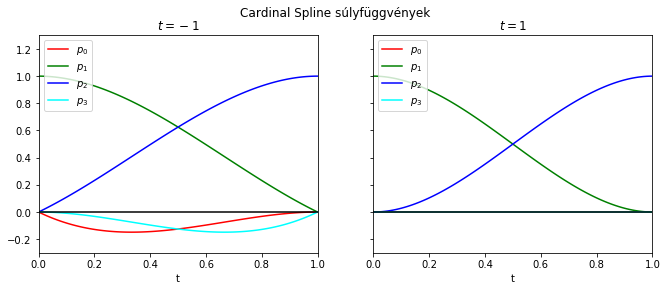

In [44]:
def cardinalSplineBlendingFunctions(s, axes):
    t = np.linspace(0, 1, 100)
    k = 0.5 * (1 - s)

    b0 = (-k * (t**3)) + (2 * k * (t**2)) + (-k * t)
    b1 = ((2 - k) * (t**3)) + ((k - 3) * (t**2)) + 1
    b2 = ((k - 2) * (t**3)) + ((3 - (2 * k)) * (t**2)) + (k * t)
    b3 = (k * (t**3)) + (-k * (t**2)) 

    axes.set_xlim([0, 1])
    axes.set_ylim([-0.3, 1.3])

    axes.plot(t, b0, 'r', label='$p_0$')
    axes.plot(t, b1, 'g', label='$p_1$')
    axes.plot(t, b2, 'b', label='$p_2$')
    axes.plot(t, b3, 'cyan', label='$p_3$')
    
    axes.axhline(y=0, color='k')
    
    axes.legend(loc=2);

    axes.set_xlabel('t')
    axes.set_title('$t = ' + str(s) + '$');


def showCardinalSplineBlendingFunctions():
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True, figsize = (11, 4))
    
    plt.suptitle("Cardinal Spline súlyfüggvények")
    
    cardinalSplineBlendingFunctions(-1, ax1)
    cardinalSplineBlendingFunctions(1, ax2)
    
showCardinalSplineBlendingFunctions()

### A teljes görbe

Miután láttuk, hogyan jön létre egy szegmens, nézzük meg, hogyan írható le az egész görbe! Legyenek a $P_0, P_1, \ldots, P_n$ kontrollpontok, valamint a feszesség $s \in (-\infty, 1]$ értéke adott. Legyen most $t \in [0, n - 2]$! Ekkor

$$
c(t) =
\begin{cases}
c_0(t) & t \in [0, 1] \\
c_1(t - 1) & t \in (1, 2] \\
c_2(t - 2) & t \in (2, 3] \\
\vdots \\
c_{n - 3}(t - n + 3) & t \in (n - 3, n - 2]
\end{cases}.
$$

A teljes görbe tehát matematikailag is a kisebb darabok összeillesztésével áll elő, egy olyan szakaszosan definiált függvény formájában, mely a paraméter értékének megfelelő darabból állít elő pontokat. Azonban ez még nem a jól megszokott, lineáris kombináció formájában felírt paraméteres egyenlet. Hogyan tudnánk ahhoz eljutni?

Pontosan azt kell tennünk, amit a jegyzet elején, az $f(t)$ függvény esetén tettünk: meg kell vizsgálnunk, hogy az egyes kontrollpontok mikor milyen együtthatóval bírnak. Jelölje $p_0(t), p_1(t), p_2(t), p_3(t)$ az előzőleg, a feltételek alapján felírt Cardinal Spline súlyfüggvényeket. Ezek segítségével bontsuk ki a $c_i(t)$ kifejezéseket:

$$
c(t) =
\begin{cases}
\vdots & t \leq 1 \\
p_0(t - 1)P_1 + p_1(t - 1)P_2 + p_2(t - 1)P_3 + \color{red}{p_3(t - 1)P_4}  & t \in (1, 2] \\
p_0(t - 2)P_2 + p_1(t - 2)P_3 + \color{red}{p_2(t - 2)P_4} + p_3(t - 2)P_5 & t \in (2, 3] \\
p_0(t - 3)P_3 + \color{red}{p_1(t - 3)P_4} + p_2(t - 3)P_5 + p_3(t - 3)P_6 & t \in (3, 4] \\
\color{red}{p_0(t - 4)P_4} + p_1(t - 4)P_5 + p_2(t - 4)P_6 + p_3(t - 4)P_7 & t \in (4, 5] \\
\vdots & t > 5
\end{cases}.
$$

Látható, hogy igen szabályos rendben sorakoznak az egyes intervallumokhoz tartozó kifejezések. Piros színnel ki lett emelve egy tetszőleges, általános kontrollpont, $P_4$. Ez a pont négy szegmens kialakításában is szerepet játszik, és mind a négy alkalommal másik súlyfüggvénnyel van megszorozva. Vizsgáljuk meg, hogy $t$ értékétől függően hogyan alakul a $P_4$-hez tartozó együttható:

$$
b_4(t) =
\begin{cases}
0 & t \leq 1 \\
p_3(t - 1) & t \in (1, 2] \\
p_2(t - 2) & t \in (2, 3] \\
p_1(t - 3) & t \in (3, 4] \\
p_0(t - 4) & t \in (4, 5] \\
0 & t > 5
\end{cases}.
$$

Mivel $P_4$ négy szegmensben vesz részt, ezért $b_4(t)$ is csak négy szakaszon vesz fel $0$-tól különböző értéket. Ha $P_4$-re, egy tetszőlegesen kiválasztott kontrollpontra fel tudtunk írni egy ilyen szakaszosan definiált függvényt, akkor általánosan, a $P_i$ pontra is tudnunk kell definiálni:

$$
b_i(t) =
\begin{cases}
0 & t \leq i - 3 \\
p_3(t - 1) & t \in (i - 3, i - 2] \\
p_2(t - 2) & t \in (i - 2, i - 1] \\
p_1(t - 3) & t \in (i - 1, i] \\
p_0(t - 4) & t \in (i, i + 1] \\
0 & t > i + 1
\end{cases}.
$$

A $b_i(t)$ függvény is csak négy intervallumon vesz fel nullától különböző értéket, és ezeken az intervallumokon a megfelelő Cardinal Spline súlyfüggvények határozzák meg az értékét. Lényegében egymás mellé raktuk, és megfelelően eltoltuk a négy súlyfüggvényt. Egyszerűsítsük le az előző definíciót úgy, hogy elhagyjuk az alsó $i$ indexet, függetlenné téve ezzel a függvényt a konkrét kontrollponttól:

$$
b(t) =
\begin{cases}
0 & t \leq -2 \\
p_3(t + 2) & t \in (-2, -1] \\
p_2(t + 1) & t \in (-1, 0] \\
p_1(t) & t \in (0, 1] \\
p_0(t - 1) & t \in (1, 2] \\
0 & t > 2
\end{cases}.
$$

Ábrázoljuk is a $b(t)$ függvényt!

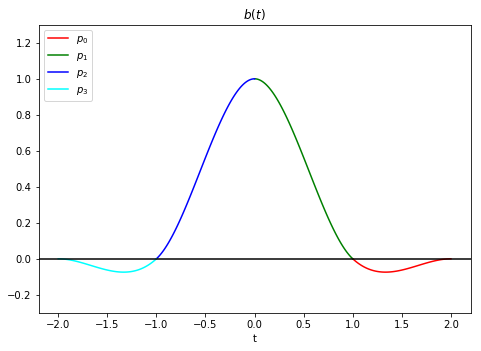

In [42]:
def assembledCardinalSplineBlendingFunctions():
    t = np.linspace(0, 1, 100)
    k = 0.5

    b0 = (-k * (t**3)) + (2 * k * (t**2)) + (-k * t)
    b1 = ((2 - k) * (t**3)) + ((k - 3) * (t**2)) + 1
    b2 = ((k - 2) * (t**3)) + ((3 - (2 * k)) * (t**2)) + (k * t)
    b3 = (k * (t**3)) + (-k * (t**2)) 

    fig = plt.figure()

    axes = fig.add_axes([0, 0, 1, 1])
    
    axes.set_ylim([-0.3, 1.3])

    axes.plot(t + 1, b0, 'r', label='$p_0$')
    axes.plot(t, b1, 'g', label='$p_1$')
    axes.plot(t - 1, b2, 'b', label='$p_2$')
    axes.plot(t - 2, b3, 'cyan', label='$p_3$')
    
    axes.axhline(y=0, color='k')
    
    axes.legend(loc=2);

    axes.set_xlabel('t')
    axes.set_title('$b(t)$');
    
assembledCardinalSplineBlendingFunctions()

Így pedig már felírhatjuk az ismert, lineáris kombinációt magában foglaló alakot a következőképpen:

$$
\gamma(t) = \sum\limits_{i = 0}^{n}b(t - i)P_i \qquad t \in [0, n - 2]
$$

#### Demonstráció

A kék téglalapba kattintva tetszőleges számú kontrollpontot helyezhetünk el, melyekre Cardinal Spline lesz illesztve. Legalább négy darab kontrollpont szükséges a görbe kirajzolásához.

In [3]:
addScript("js/cardinal-spline-demo", "cardinal-spline-demo")

## Rokon görbék

### Catmull-Rom Spline

A Catmull-Rom Spline egy speciális Cardinal Spline, mely esetén a feszesség értéke $0$.

### Kochanek-Bartels Spline

A Kochanek-Bartels Spline a Cardinal Spline egy általánosítása, mely további két nem geometriai paramétert ad hozzá a görbéhez. Ezek a *bias* és *continuity*. Ha ezeknek az értéke $0$, akkor kapjuk a Cardinal Spline-t.

A *bias* paraméter elsősorban az egyes szegmensek elejére és végére van hatással. Ha $b > 0$, akkor inkább a szegmens kezdőpontja felé hajlik a görbe, míg ha $b < 0$, akkor inkább a végpontja felé.

A *continuity* segítségével töréseket tudunk előidézni a görbében a szegmensek határainál. Ha $c > 0$, akkor a görbe úgymond befelé törik, ha $c < 0$, akkor pedig kifelé. Minél nagyobb abszolútértékben $c$ értéke, annál erőteljesebb változás fog bekövetkezni a görbében.

#### Paraméteres alak

A Kochanek-Bartels Spline által biztosított rugalmasság árát a matematikai leírás bonyolultságában kell megfizetnünk. A $P_{i}, P_{i + 1}, P_{i + 2}, P_{i + 3}$ pontokra illeszkedő szegmensnek a következő feltételeknek kell eleget tennie:

$$
\begin{align*}
kb_i(0) &= P_{i + 1} \\
kb_i(1) &= P_{i + 2} \\
kb_i^{\prime}(0) &= \frac{1}{2}(1 - s)\cdot[\,(1 + b)(1 - c)(P_{i + 1} - P_{i}) + (1 - b)(1 + c)(P_{i + 2} - P_{i + 1})\,] \\
kb_i^{\prime}(1) &= \frac{1}{2}(1 - s)\cdot[\,(1 + b)(1 + c)(P_{i + 2} - P_{i + 1}) + (1 - b)(1 - c)(P_{i + 3} - P_{i + 2})\,] \\
\end{align*}
$$

A feltételek levezetése után a következő együtthatómátrix adódik:

$$
M =
\begin{bmatrix}
-q_1 & 2q_1 & -q_1 & 0 \\
q_1 - q_2 - q_3 + 2 & q_3 - 2q_1 + 2q_2 - 3 & q_1 - q_2 & 1 \\
q_2 + q_3 - q_4 - 2 & q_4 - q_3 - 2q_2 + 3 & q_2 & 0 \\
q_4 & -q_4 & 0 & 0
\end{bmatrix},
$$

ahol

$$
\begin{align*}
k &= \frac{1}{2}(1 - s) \\
q_1 &= k (1 + b) (1 - c) \\
q_2 &= k (1 - b) (1 + c) \\
q_3 &= k (1 + b) (1 + c) \\
q_4 &= k (1 - b) (1 - c) \\
\end{align*}
$$

#### Demonstráció

A kék téglalapba kattintva tetszőleges számú kontrollpontot helyezhetünk el, melyekre Kochanek-Bartels Spline lesz illesztve. Legalább négy darab kontrollpont szükséges a görbe kirajzolásához.

Az előzőleg felírt feltételekből láthatjuk, hogy az $s$, $b$ és $c$ paraméterek kizárólag az érintővektorokon keresztül befolyásolják a görbe alakját. A demonstráció lehetőséget biztosít az érintővektorok megjelenítésére, ezáltal látványosabbá téve a paraméterek változásának hatását. Kék szín jelöli az úgynvezett kimenő vektorokat, piros pedig a bejövőket. A kimenő vektor egy szegmens végpontjának érintője, a bejövő pedig a kezdőpontjának az érintője. 

Alapesetben egy adott kontrolpontban a bejövő és a kimenő vektor azonos (különben nem lenne $C^1$ folytonos a görbe), azonban a $c$ paraméter változtatásával a két vektor egészen eltérő lehet, megtörve így a görbét.

Természetesen a kirajzolt görbe valós időben követi a paraméterek változását és a kontrollpontok mozgatását.

In [4]:
addScript("js/kochanek-bartels-spline-demo", "kochanek-bartels-spline-demo")

## Források

* D. D. Hearn, M. P. Baker, W. Caritehers (2014). *Computer Graphics With OpenGL*, Fourth Edition, pp. 417-421.
* J. F. Hughes, A. van Dam (2013). *Computer Graphics: Principles and Practice*, Third Edition, Chapter 22W, pp. 93-99. http://dept.cs.williams.edu/~morgan/cgpp/file/cgpp3e_ch22W.pdf
* Dr. Kovács Emőd (2011). *Komputergrafika: Matematikai alapok*. pp. 90-93. http://aries.ektf.hu/~hz/pdf-tamop/pdf-01/download/grafika.pdf
* P. Shirley, S. Marschner (2009). *Fundamentals of Computer Graphics*. Third Edition, pp. 363-365.

In [5]:
def styling():
    styles = open("../../styles/custom.html", "r").read()
    return HTML(styles)
styling()
